In [1]:
import pylab
from scipy import misc, signal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import fftpack as fp
from skimage.color import rgb2gray
from skimage.io import imread, imshow, show

D:\Soft\Anaconda3\envs\tf2\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
plt.figure(figsize=(80,60))
plt.gray() # show the filtered result in grayscale

<Figure size 8000x6000 with 0 Axes>

首先，signal.gaussian 函数用于生成一维高斯滤波器。在这个例子中，我们生成了两个一维高斯滤波器，一个沿着水平方向，另一个沿着垂直方向。这两个滤波器的长度分别为 im.shape[0] 和 im.shape[1]，即图像的高度和宽度。它们的标准差都为 5。

然后，我们使用 np.outer 函数计算这两个一维高斯滤波器的外积，得到一个二维高斯滤波器。这个滤波器的大小与图像相同，可以直接用来对图像进行卷积。

In [3]:
# load the cameraman image and convert it to grayscale
#im = np.mean(imread('../LLIE/images/lena.jpg'), axis=2)
im = rgb2gray(imread('../LLIE/images/lena.jpg'))

# create a 2D Gaussian kernel with a std of 5
kernel = np.outer(signal.gaussian(im.shape[0], 5), signal.gaussian(im.shape[1], 5))

在二维离散傅里叶变换中，零频分量位于频谱的左上角。但是，为了便于分析和处理，我们通常会使用 fftshift 函数将零频分量移动到频谱的中心。相应地，在逆变换之前，我们需要使用 ifftshift 函数将零频分量移回原位。

In [5]:
#对原图进行傅里叶变换
freq = fp.fft2(im)

#对kernel进行傅里叶变换
assert(freq.shape == kernel.shape) # check that the shapes match
freq_kernel = fp.fft2(fp.ifftshift(kernel)) # make sure that the kernel is centered

#频域相乘
convolved = freq*freq_kernel
im1 = fp.ifft2(convolved).real # inverse Fourier transform
im1 = 255 * im1 / np.max(im1) # normalize output
#im1 = np.clip(fp.ifft2(convolved).real, 0, 255).astype(np.uint8)
print(np.max(im1))
#im1 = signal.fftconvolve(im, kernel, mode='same')  # output blurred image

255.0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_25096\985419533.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq))).astype(int))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_25096\985419533.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq_kernel))).astype(int))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_25096\985419533.py:29: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + fp.fftshift(convolved))).astype(int))


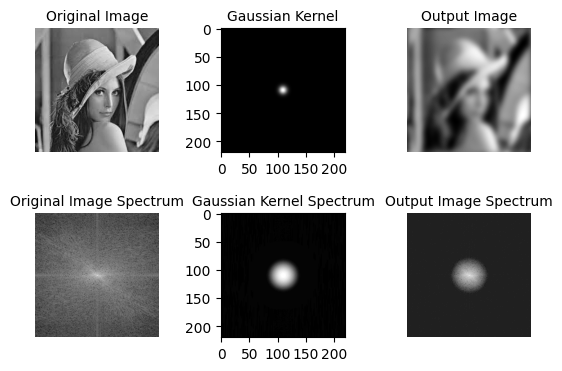

In [6]:
plt.subplot(2,3,1)
plt.imshow(im)
plt.title('Original Image', size=10)
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(kernel)
plt.title('Gaussian Kernel', size=10)
plt.xticks([0, 50, 100, 150, 200])
plt.yticks([0, 50, 100, 150, 200])

plt.subplot(2,3,3)
plt.imshow(im1) # the imaginary part is an artifact
plt.title('Output Image', size=10)
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq))).astype(int))
plt.title('Original Image Spectrum', size=10)
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq_kernel))).astype(int))
plt.title('Gaussian Kernel Spectrum', size=10)
plt.xticks([0, 50, 100, 150, 200])
plt.yticks([0, 50, 100, 150, 200])

plt.subplot(2,3,6)
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(convolved))).astype(int))
plt.title('Original Image Spectrum', size=10)
plt.title('Output Image Spectrum', size=10)
plt.axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0)
plt.show()

二维高斯LPF频谱

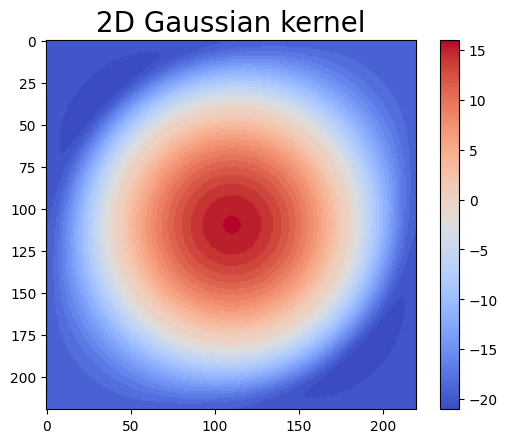

In [91]:
# create a 2D Gaussian kernel with a std of 5
im = rgb2gray(imread('../LLIE/images/lena.jpg'))
gauss_kernel = np.outer(signal.gaussian(im.shape[0],1),signal.gaussian(im.shape[1],1))
freq = fp.fft2(im)
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel))
pylab.imshow( (20*np.log10( 0.1+fp.fftshift(freq_kernel))).real.astype(int),cmap='coolwarm') # 0.1 for better visualization
pylab.colorbar()
plt.title('2D Gaussian kernel', size=20)
pylab.show()


fftconvolve()函数

(220, 220)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14560\3639492559.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


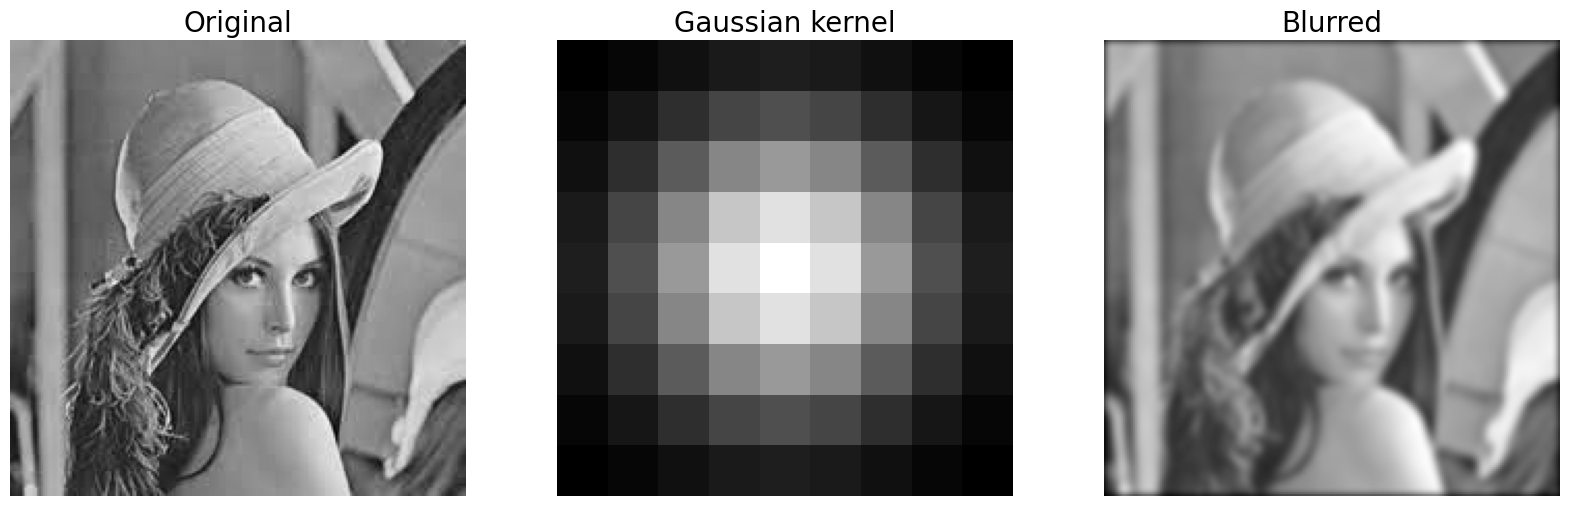

In [109]:
# load the cameraman image and convert it to grayscale
im = np.mean(imread('../LLIE/images/lena.jpg'), axis=2)
print(im.shape)
# (224,225)
kernel = np.outer(signal.gaussian(9, 2), signal.gaussian(9, 2)) # 2D Gaussian kernel with σ = 8

im_blurred_freq = signal.fftconvolve(im, kernel, mode='same')
fig, (ax_orig, ax_kernel, ax_blurred) = plt.subplots(1, 3, figsize=(20,8))

ax_orig.imshow(im, cmap='gray')
ax_orig.set_title('Original', size=20)
ax_orig.set_axis_off()

ax_kernel.imshow(kernel) #, cmap='gray')
ax_kernel.set_title('Gaussian kernel', size=20)
ax_kernel.set_axis_off()

ax_blurred.imshow(im_blurred_freq, cmap='gray')
ax_blurred.set_title('Blurred', size=20)
ax_blurred.set_axis_off()
fig.show()

(224, 225)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14560\1235100068.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


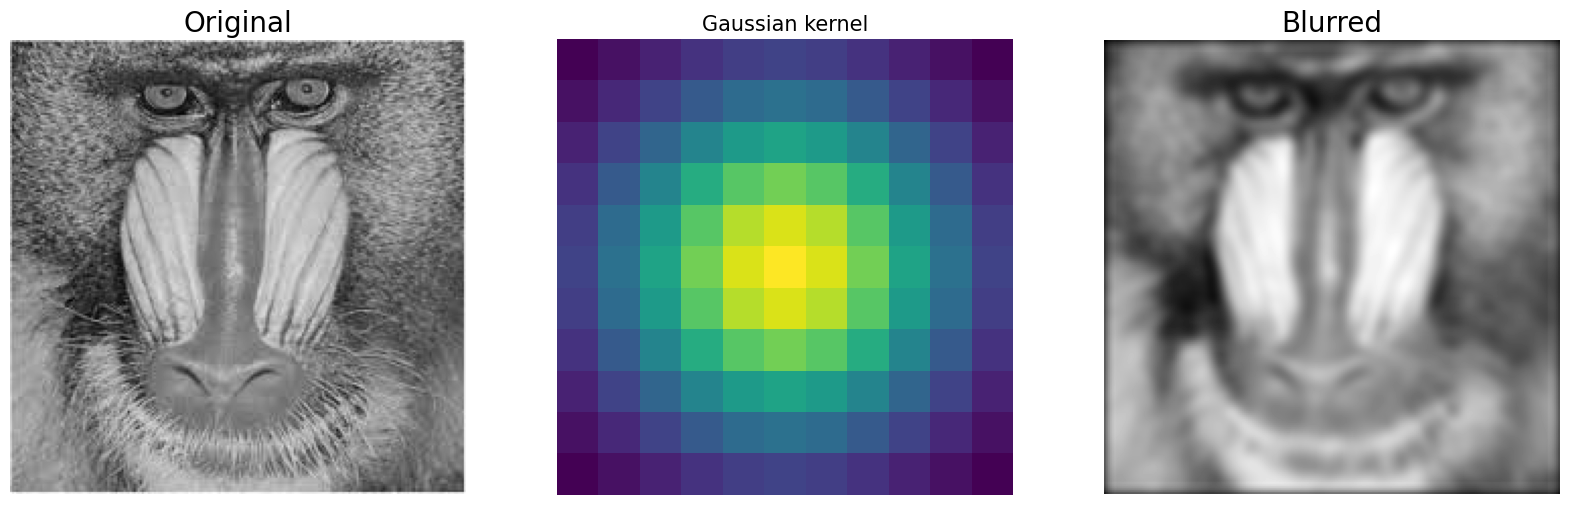

In [116]:
im = np.mean(imread('../LLIE/images/mandrill.jpg'), axis=2)
print(im.shape)
# (224, 225)
kernel = np.outer(signal.gaussian(11, 3), signal.gaussian(11, 3)) # 2D Gaussian kernel of size 11x11 with σ = 3
im_blurred = signal.fftconvolve(im, kernel, mode='same')
fig, (ax_orig, ax_kernel, ax_blurred) = plt.subplots(1, 3, figsize=(20,8))

ax_orig.imshow(im, cmap='gray')
ax_orig.set_title('Original', size=20)
ax_orig.set_axis_off()

ax_kernel.imshow(kernel, cmap='viridis')
ax_kernel.set_title('Gaussian kernel', size=15)
ax_kernel.set_axis_off()

ax_blurred.imshow(im_blurred, cmap='gray')
ax_blurred.set_title('Blurred', size=20)
ax_blurred.set_axis_off()
fig.show()

绘制原始图像和模糊图像的频谱

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14560\3989451250.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14560\3989451250.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray)


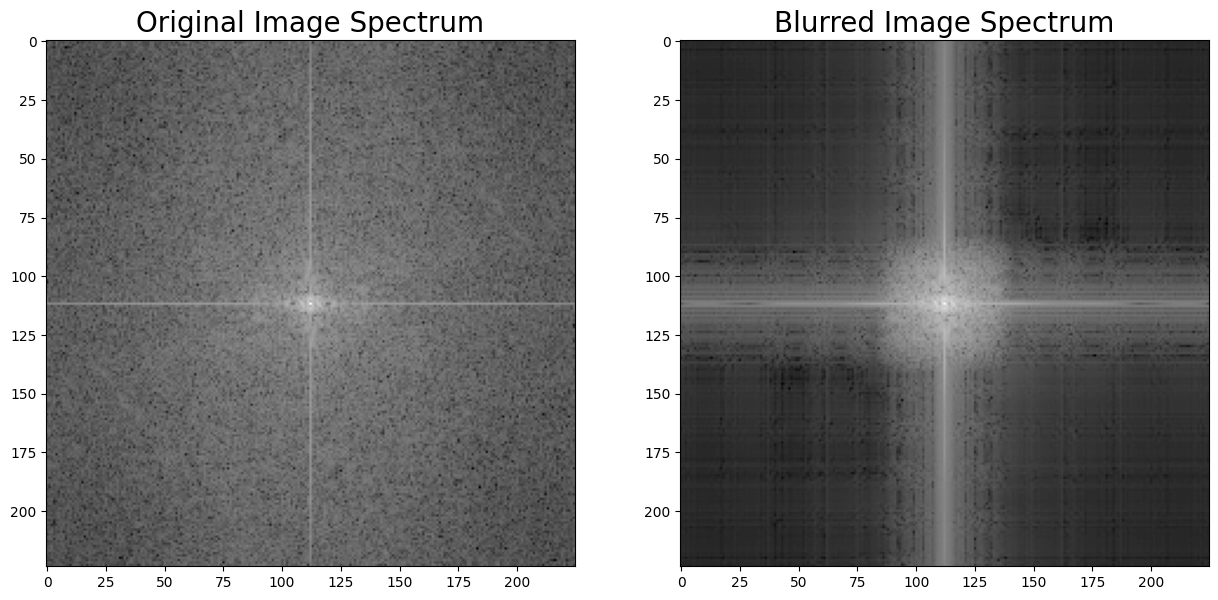

In [117]:
from scipy import fftpack

# load the cameraman image and convert it to grayscale
F1 = fftpack.fft2((im).astype(float))
# shift the zero-frequncy component to the center of the spectrum
F2 = fftpack.fftshift( F1 )

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray)
plt.title('Original Image Spectrum', size=20)

# load the cameraman image and convert it to grayscale
F1 = fftpack.fft2((im_blurred).astype(float))
# shift the zero-frequncy component to the center of the spectrum
F2 = fftpack.fftshift( F1 )

plt.subplot(1,2,2)
plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray)
plt.title('Blurred Image Spectrum', size=20)
plt.show()

计算维多利亚纪念馆的形象的模糊版本，但是采用了更大(50×50)的高斯核，其中$\sigma=10$

(540, 720)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14560\831342175.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


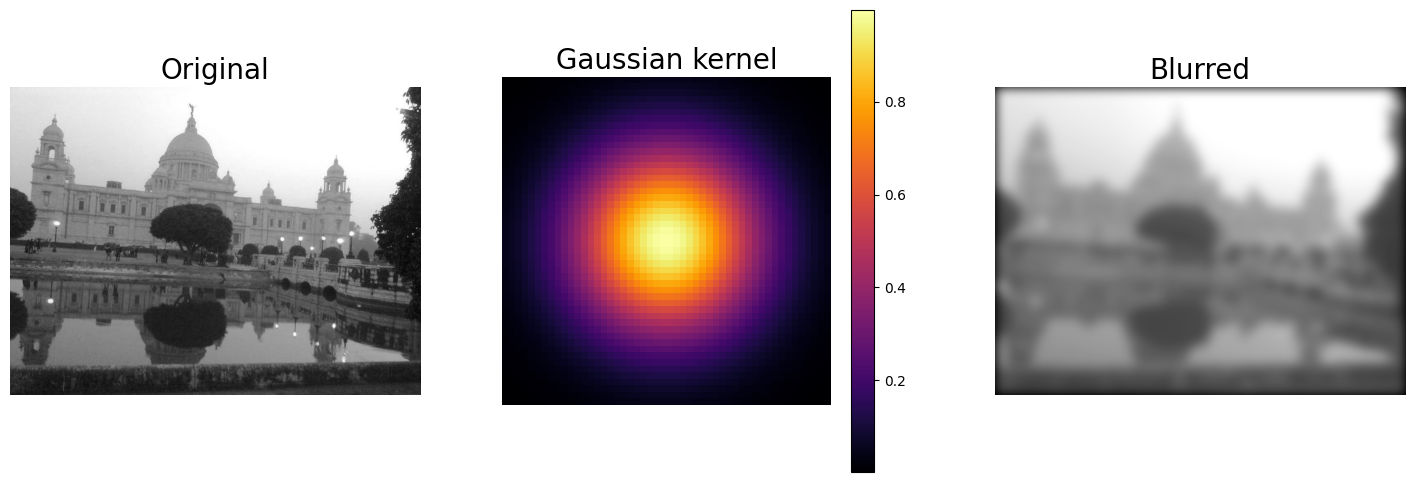

In [118]:
from scipy import misc, signal
im = np.mean(imread('../LLIE/images/vic.png'), axis=2) #np.mean(misc.face(), axis=2)
print(im.shape)

kernel = np.outer(signal.gaussian(50, 10), signal.gaussian(50, 10))
im_blurred = signal.fftconvolve(im, kernel, mode='same')

fig, (ax_orig, ax_kernel, ax_blurred) = plt.subplots(1, 3, figsize=(18,6))

ax_orig.imshow(im, cmap='gray')
ax_orig.set_title('Original', size=20)
ax_orig.set_axis_off()

ims = ax_kernel.imshow(kernel, cmap=plt.cm.inferno) #, cmap='gray')
ax_kernel.set_title('Gaussian kernel', size=20)
ax_kernel.set_axis_off()

fig.colorbar(ims, ax=ax_kernel)
ax_blurred.imshow(im_blurred, cmap='gray')
ax_blurred.set_title('Blurred', size=20)
ax_blurred.set_axis_off()
fig.show()

比较Scipy  convolve()和fftconvolve()函数的区别。
可以利用Python的timeit模块来比较两个函数的运行时间。

convolve 函数使用直接卷积方法来计算卷积。它对于小型数组的卷积效果较好，但是当数组变大时，计算时间会显著增加。

fftconvolve 函数使用快速傅里叶变换（FFT）方法来计算卷积。它首先对两个数组进行傅里叶变换，然后将变换后的结果相乘，最后再进行逆傅里叶变换。这种方法的计算时间与数组的大小无关，因此对于大型数组的卷积效果较好。


1.定义了一个名为 wrapper_convolve 的装饰器函数。这个函数接受一个函数作为参数，并返回一个新的函数。这个新函数调用传入的函数，并向其传递预定义的参数。

2.使用 wrapper_convolve 函数分别包装 convolve 和 fftconvolve 函数，得到两个新的函数：wrapped_convolve 和 wrapped_fftconvolve。

3.最后，使用 timeit 模块中的 repeat 函数来比较这两个函数的执行时间。它分别对两个函数进行了 100 次重复测试，并记录了每次测试的执行时间。

In [130]:
from scipy import misc, signal
import timeit

im = np.mean(imread('../LLIE/images/mandrill.jpg'), axis=2)
print(im.shape)
# (224, 225)

kernel = np.outer(signal.gaussian(11, 3), signal.gaussian(11, 3)) # 2D Gaussian kernel of size 11x11 with σ = 3

# convolve() and fftconvolve()

im_blurred1 = signal.convolve(im, kernel, mode="same") # convolve
im_blurred2 = signal.fftconvolve(im, kernel, mode='same') # fftconvolve

# compare the results
def wrapper_convolve(func):
    def wrapped_convolve():
        return func(im, kernel, mode="same")
    return wrapped_convolve

# wrap the functions
wrapped_convolve = wrapper_convolve(signal.convolve)
wrapped_fftconvolve = wrapper_convolve(signal.fftconvolve)

# compare the execution time
times1 = timeit.repeat(wrapped_convolve, number=1, repeat=100)
times2 = timeit.repeat(wrapped_fftconvolve, number=1, repeat=100)

(224, 225)


(-0.5, 224.5, 223.5, -0.5)

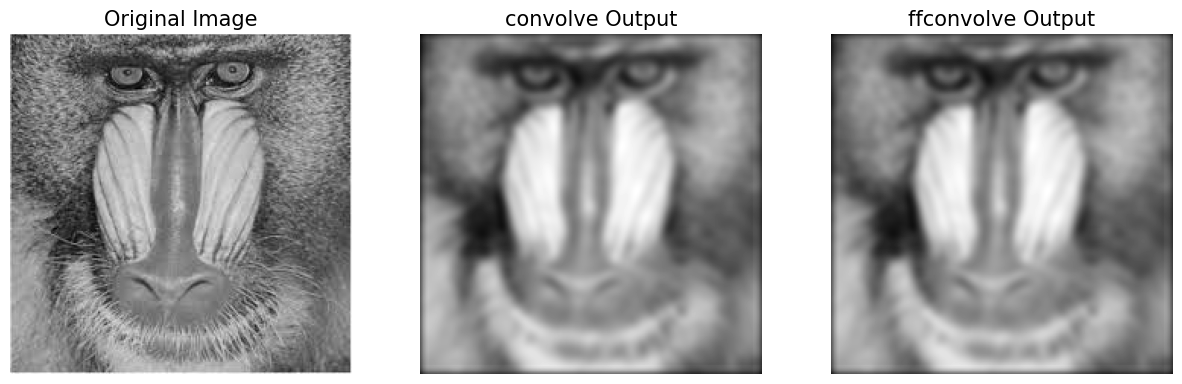

In [132]:
plt.figure(figsize=(15,5))
plt.gray()

plt.subplot(131)
plt.imshow(im)
plt.title('Original Image', size=15)
plt.axis('off')

plt.subplot(132)
plt.imshow(im_blurred1)
plt.title('convolve Output', size=15)
plt.axis('off')

plt.subplot(133)
plt.imshow(im_blurred2)
plt.title('ffconvolve Output', size=15)
plt.axis('off')

每个函数都在相同的高斯核的输入图像上运行了100次，然后绘制每个函数所花费时间的箱型图。

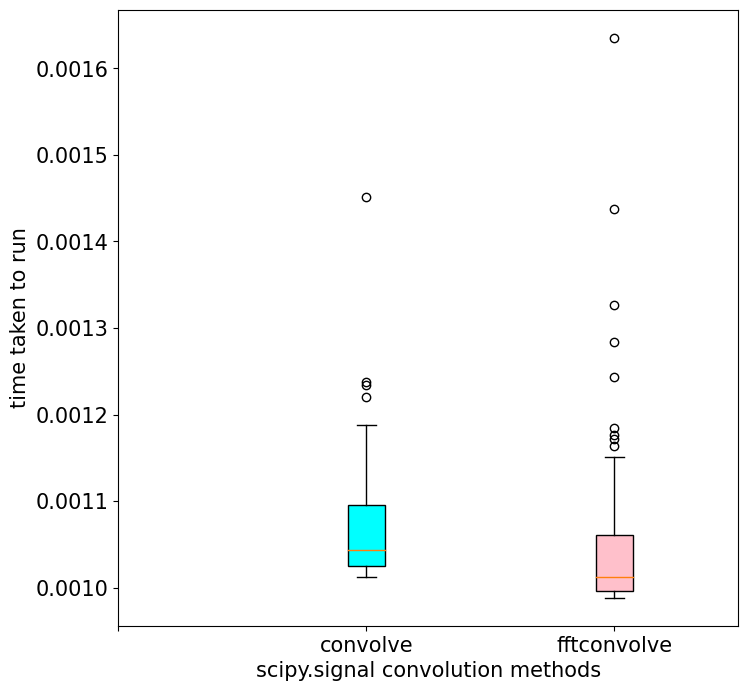

In [133]:
data = [times1, times2]
plt.figure(figsize=(8,8))
box = plt.boxplot(data, patch_artist=True) #notch=True,
colors = ['cyan', 'pink'] #'lightblue', 'lightgreen', 'tan',
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    #patch.set_edgecolor(color)
plt.xticks(np.arange(3), ('', 'convolve', 'fftconvolve'), size=15) #, rotation=90
plt.yticks(fontsize=15)
plt.xlabel('scipy.signal convolution methods', size=15)
plt.ylabel('time taken to run', size = 15)
plt.show()